# 1.3 Task - BELGRADE 1980 - NK

### This script contains:
#### #1)  Import libraries and data
#### #2) reduce to just the mean temperatures
#### #3) reduce to just one year of data for one of the weather stations- analyzie and choose which year to use
#### #4) plot all weather data for all stations for a year
#### #5) create an index for the year - in order to translate your chosen weather data into the X and y datasets needed for the optimization function
#### - compute gradient 

In [32]:
import pandas as pd
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
import os
from mpl_toolkits import mplot3d

from plotly.offline import download_plotlyjs, init_notebook_mode
from plotly.offline import plot, iplot
import plotly.graph_objects as go

In [33]:
# import path
path = r'/Users/nancykray/Desktop/CF/Machine Learning - 1'

In [34]:
# import the scaled European weather data
climate = pd.read_csv(os.path.join(path, 'ClimateWins', 'Data Sets', 'Dataset-weather-prediction-dataset-processed.csv'))

In [35]:
climate.head()

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,7,2.1,0.85,1.018,0.32,0.09,0,0.7,...,5,0.88,1.0003,0.45,0.34,0,4.7,8.5,6.0,10.9
1,19600102,1,6,2.1,0.84,1.018,0.36,1.05,0,1.1,...,7,0.91,1.0007,0.25,0.84,0,0.7,8.9,5.6,12.1
2,19600103,1,8,2.1,0.90,1.018,0.18,0.30,0,0.0,...,7,0.91,1.0096,0.17,0.08,0,0.1,10.5,8.1,12.9
3,19600104,1,3,2.1,0.92,1.018,0.58,0.00,0,4.1,...,7,0.86,1.0184,0.13,0.98,0,0.0,7.4,7.3,10.6
4,19600105,1,6,2.1,0.95,1.018,0.65,0.14,0,5.4,...,3,0.80,1.0328,0.46,0.00,0,5.7,5.7,3.0,8.4


In [36]:
#Reduce to just the mean temperatures
df = climate[['DATE', 'MONTH','BASEL_temp_mean',
 'BELGRADE_temp_mean',
 'BUDAPEST_temp_mean',
 'DEBILT_temp_mean',
 'DUSSELDORF_temp_mean',
 'GDANSK_temp_mean',
 'HEATHROW_temp_mean',
 'KASSEL_temp_mean',
 'LJUBLJANA_temp_mean',
 'MAASTRICHT_temp_mean',
 'MADRID_temp_mean',
 'MUNCHENB_temp_mean',
 'OSLO_temp_mean',
 'ROMA_temp_mean',
 'SONNBLICK_temp_mean',
 'STOCKHOLM_temp_mean',
 'TOURS_temp_mean',
 'VALENTIA_temp_mean']].copy()

In [37]:
df

,DATE,MONTH,BASEL_temp_mean,BELGRADE_temp_mean,BUDAPEST_temp_mean,DEBILT_temp_mean,DUSSELDORF_temp_mean,GDANSK_temp_mean,HEATHROW_temp_mean,KASSEL_temp_mean,LJUBLJANA_temp_mean,MAASTRICHT_temp_mean,MADRID_temp_mean,MUNCHENB_temp_mean,OSLO_temp_mean,ROMA_temp_mean,SONNBLICK_temp_mean,STOCKHOLM_temp_mean,TOURS_temp_mean,VALENTIA_temp_mean
0,19600101,1,6.5,3.7,2.4,9.3,10.0,0.8,10.6,7.9,-0.6,9.5,7.6,6.9,4.9,7.8,-5.9,4.2,10.0,8.5
1,19600102,1,6.1,2.9,2.3,7.7,8.2,1.6,6.1,7.7,2.1,8.6,9.8,6.2,3.4,12.2,-9.5,4.0,9.5,8.9
2,19600103,1,8.5,3.1,2.7,6.8,7.1,0.7,8.4,6.5,4.6,6.9,8.6,5.8,1.9,10.2,-9.5,2.4,10.3,10.5
3,19600104,1,6.3,2.0,2.0,6.7,6.8,-0.1,9.4,5.8,3.2,7.0,10.3,3.9,3.0,10.8,-11.5,1.2,11.2,7.4
4,19600105,1,3.0,2.0,2.5,8.0,7.7,0.4,8.9,5.4,3.6,8.1,12.1,1.8,3.7,9.9,-9.3,3.3,11.4,5.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,20221027,10,15.9,18.2,11.7,15.7,17.8,11.5,16.4,9.1,14.7,18.6,20.0,14.3,9.7,15.4,0.6,11.5,19.9,10.7
22946,20221028,10,16.7,15.9,11.7,16.0,19.4,11.7,15.8,9.1,12.9,18.9,19.1,16.1,10.9,15.4,2.3,12.5,20.3,10.7
22947,20221029,10,16.7,13.4,11.7,15.8,18.2,14.2,16.5,9.1,13.2,18.2,19.0,17.4,9.7,15.4,3.3,13.1,20.6,10.7
22948,20221030,10,15.4,15.0,11.7,14.4,16.7,11.0,15.2,9.1,14.0,16.3,15.7,14.5,5.9,15.4,3.4,7.5,15.9,10.7


In [38]:
#Drop the DATE and MONTH data as those numbers are not scaled with the rest.
notemp = df.drop(['DATE','MONTH'], axis=1)

In [39]:
#Look at a whisker plot of the data to see variations in temperatures
notemp.boxplot(figsize=(15,15))
plt.xticks(rotation=90)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18]),
 [Text(1, 0, 'BASEL_temp_mean'),
  Text(2, 0, 'BELGRADE_temp_mean'),
  Text(3, 0, 'BUDAPEST_temp_mean'),
  Text(4, 0, 'DEBILT_temp_mean'),
  Text(5, 0, 'DUSSELDORF_temp_mean'),
  Text(6, 0, 'GDANSK_temp_mean'),
  Text(7, 0, 'HEATHROW_temp_mean'),
  Text(8, 0, 'KASSEL_temp_mean'),
  Text(9, 0, 'LJUBLJANA_temp_mean'),
  Text(10, 0, 'MAASTRICHT_temp_mean'),
  Text(11, 0, 'MADRID_temp_mean'),
  Text(12, 0, 'MUNCHENB_temp_mean'),
  Text(13, 0, 'OSLO_temp_mean'),
  Text(14, 0, 'ROMA_temp_mean'),
  Text(15, 0, 'SONNBLICK_temp_mean'),
  Text(16, 0, 'STOCKHOLM_temp_mean'),
  Text(17, 0, 'TOURS_temp_mean'),
  Text(18, 0, 'VALENTIA_temp_mean')])

In [40]:
#Reduce your dataset to a single year
dfyear = df[df['DATE'].astype(str).str.contains('1980')] #<-----INSERT YEAR HERE
dfyear

,DATE,MONTH,BASEL_temp_mean,BELGRADE_temp_mean,BUDAPEST_temp_mean,DEBILT_temp_mean,DUSSELDORF_temp_mean,GDANSK_temp_mean,HEATHROW_temp_mean,KASSEL_temp_mean,LJUBLJANA_temp_mean,MAASTRICHT_temp_mean,MADRID_temp_mean,MUNCHENB_temp_mean,OSLO_temp_mean,ROMA_temp_mean,SONNBLICK_temp_mean,STOCKHOLM_temp_mean,TOURS_temp_mean,VALENTIA_temp_mean
7305,19800101,1,-0.8,-0.6,0.3,0.9,0.5,-1.2,-1.8,-1.6,-1.7,-0.1,12.5,-2.6,-3.7,4.5,-19.7,-0.9,3.2,4.4
7306,19800102,1,-1.7,-1.7,0.2,-0.4,0.4,-1.0,-1.8,-1.1,-2.5,-0.2,8.4,-3.6,-6.2,3.7,-22.2,-4.1,1.4,6.4
7307,19800103,1,-0.6,-2.5,-2.3,-2.3,-0.2,-1.6,2.6,-4.8,-3.1,-0.3,5.5,-4.5,-11.5,1.8,-23.6,-5.8,0.6,9.2
7308,19800104,1,-0.9,-5.9,-4.9,1.6,1.8,-3.2,5.2,-1.5,-6.2,2.1,5.5,-5.1,-15.2,-0.7,-18.8,-6.3,5.2,7.7
7309,19800105,1,3.0,-4.1,-7.1,3.9,4.8,-5.1,4.8,1.3,0.1,4.0,5.6,2.4,-7.2,3.1,-10.5,-1.3,6.6,7.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7666,19801227,12,0.7,1.2,2.7,0.8,1.6,0.0,2.0,0.6,1.3,0.4,5.7,-1.9,-6.8,4.6,-18.6,-1.4,3.2,6.7
7667,19801228,12,-1.4,1.2,3.6,1.0,2.5,-0.1,3.4,-1.9,-0.5,0.2,3.7,-6.6,2.6,5.3,-17.9,0.9,0.4,7.2
7668,19801229,12,-2.7,0.8,1.5,6.2,5.5,3.7,6.2,0.1,-5.2,4.2,5.1,-11.0,5.8,5.5,-11.4,4.4,-2.1,9.8
7669,19801230,12,-2.5,0.0,2.0,7.7,6.6,7.1,9.0,2.5,-5.7,5.6,7.5,-5.8,3.3,4.7,-6.3,4.1,-1.0,10.2


In [41]:
dfyear.describe()

,DATE,MONTH,BASEL_temp_mean,BELGRADE_temp_mean,BUDAPEST_temp_mean,DEBILT_temp_mean,DUSSELDORF_temp_mean,GDANSK_temp_mean,HEATHROW_temp_mean,KASSEL_temp_mean,LJUBLJANA_temp_mean,MAASTRICHT_temp_mean,MADRID_temp_mean,MUNCHENB_temp_mean,OSLO_temp_mean,ROMA_temp_mean,SONNBLICK_temp_mean,STOCKHOLM_temp_mean,TOURS_temp_mean,VALENTIA_temp_mean
count,3.660000e+02,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,1.980067e+07,6.513661,8.940984,10.774044,10.070765,9.249180,9.993443,6.375683,10.370492,8.014481,9.059016,9.021038,14.194809,7.285246,5.293716,14.230328,-6.228962,6.062568,10.891803,10.353005
std,3.457653e+02,3.455958,6.809736,8.276311,8.064184,6.261431,6.618559,7.976670,5.402866,6.985612,7.810356,6.373392,7.371745,7.512098,9.303264,6.340164,6.832740,8.641029,6.229465,3.486118
min,1.980010e+07,1.000000,-7.900000,-9.300000,-11.800000,-7.000000,-5.800000,-11.400000,-1.800000,-8.700000,-11.400000,-6.500000,-0.200000,-11.000000,-19.000000,-0.700000,-26.000000,-16.000000,-4.400000,1.500000
25%,1.980040e+07,4.000000,3.750000,3.800000,3.425000,4.550000,5.200000,-0.700000,6.125000,2.800000,2.550000,4.450000,8.325000,1.450000,-2.000000,9.300000,-11.200000,-0.875000,5.800000,7.800000
50%,1.980070e+07,7.000000,8.700000,11.250000,10.650000,9.450000,10.000000,6.650000,10.150000,7.850000,9.050000,8.850000,12.850000,7.400000,5.800000,13.300000,-5.800000,6.100000,11.200000,10.350000
75%,1.980098e+07,9.750000,14.200000,17.400000,16.575000,14.400000,15.000000,13.700000,14.800000,13.575000,15.525000,13.900000,20.600000,13.175000,13.100000,20.200000,-1.400000,13.400000,15.800000,13.100000
max,1.980123e+07,12.000000,24.600000,27.400000,27.200000,22.600000,24.900000,22.100000,22.000000,23.600000,25.000000,23.300000,30.400000,26.200000,22.800000,28.000000,8.800000,22.400000,24.400000,17.900000


In [42]:
#Drop the DATE and MONTH data as those numbers are not scaled with the rest.
notempyear = dfyear.drop(['DATE','MONTH'], axis=1)

In [43]:
#Plot ALL weather data for all stations for a year 

#X = weather station
#Y = day of the year
#Z = temperature

#you can click/hold in the graph below to rotate!

fig = go.Figure(data=[go.Surface(z=notempyear.values)])
fig.update_layout(title='Temperatures over time', autosize=False,
                  width=600, height=600)
fig.show()

In [44]:
#We need to make an index for the year. Create a set of data from 1 to 366 (or to 366 if it's a leap year! 1980 is)
#We'll scale this by 100 as the index is made. This will help teh gradient descent converge 366 = 3.66

i = np.arange(0.01,3.67,0.01) #<---needs to be one GREATER than the total number of days
index = pd.DataFrame(data = i, columns = ['index'])
index

,index
0,0.01
1,0.02
2,0.03
3,0.04
4,0.05
...,...
361,3.62
362,3.63
363,3.64
364,3.65


In [45]:
n_rows = dfyear.shape[0]
n_rows

366

In [46]:
#This will translate your chosen weather data into the X and y datasets needed for the optimization function.

X=index.to_numpy().reshape(n_rows,1)
#Represent x_0 as a vector of 1s for vector computation
ones = np.ones((n_rows,1))
X = np.concatenate((ones, X), axis=1)
y=dfyear['BELGRADE_temp_mean'].to_numpy().reshape(n_rows,1) #<----INSERT WEATHER STATION HERE

In [47]:
X.shape, y.shape

((366, 2), (366, 1))

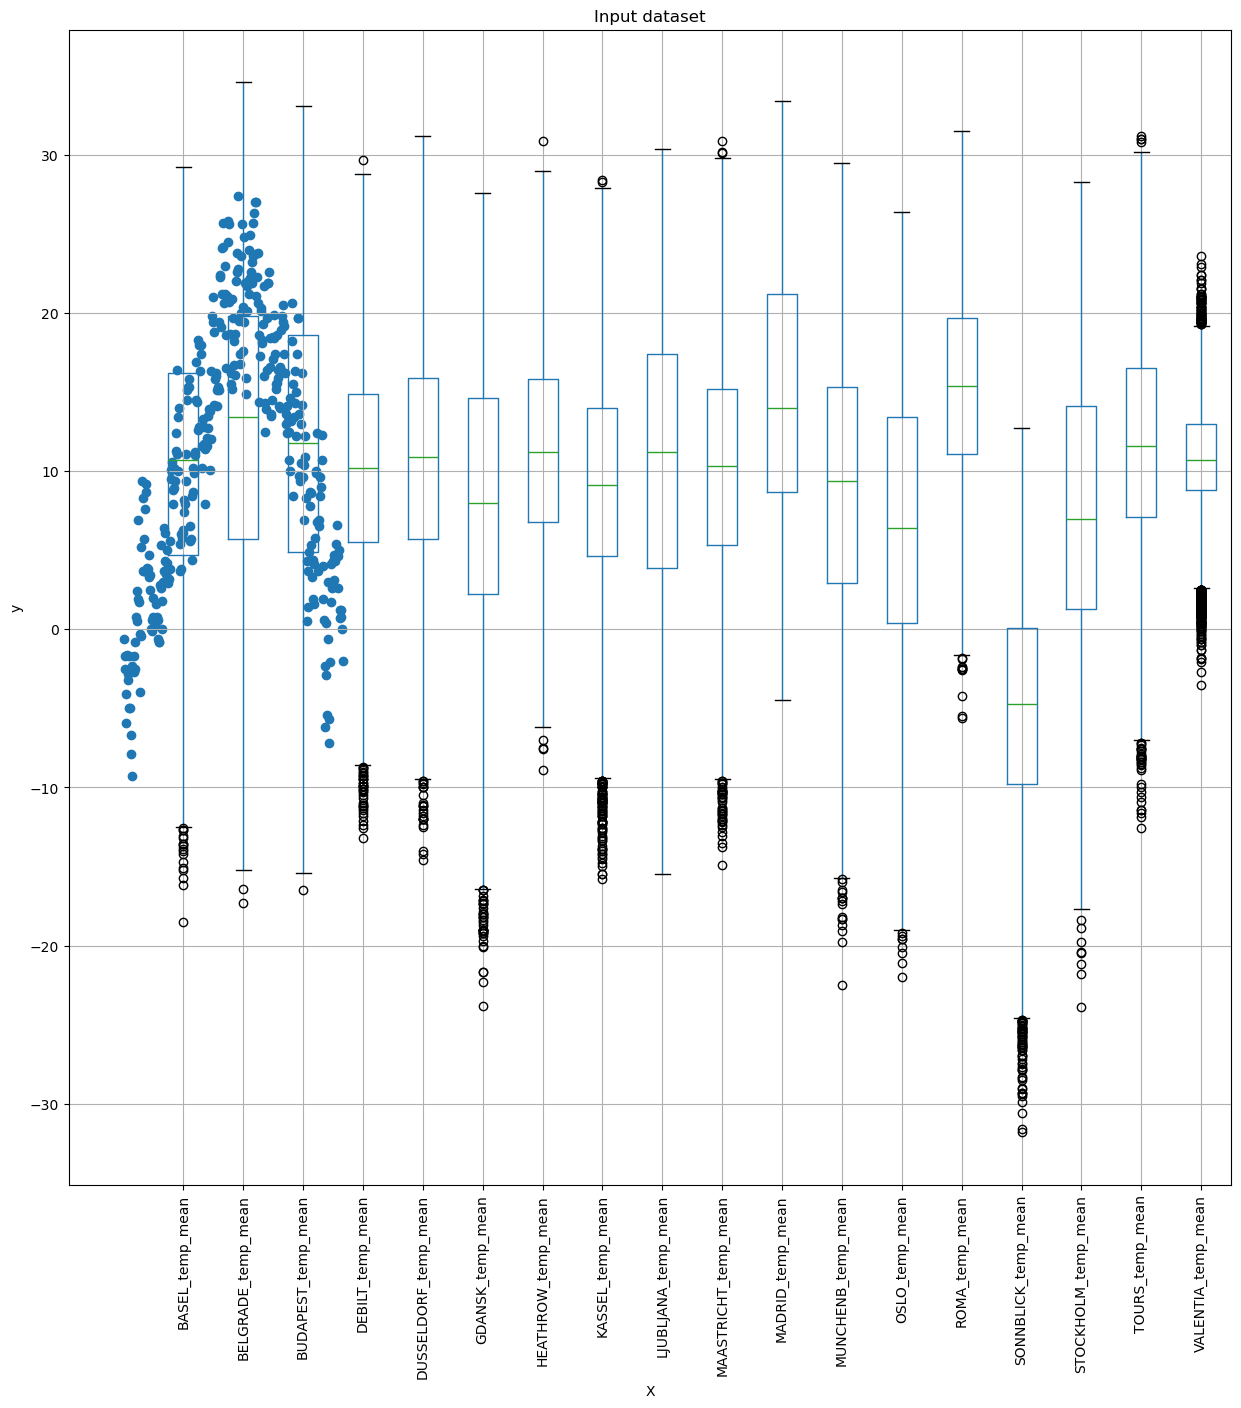

In [48]:
#Look at one year of temperature data over time
plt.scatter(x=index['index'], y=dfyear['BELGRADE_temp_mean']) #<----INSERT WEATHER STATION HERE
plt.xlabel('X'); plt.ylabel('y');
plt.title('Input dataset');
plt.show()

In [49]:
#what is the min temperature? (Note gradient descent is not actually finding this number)
dfyear['BELGRADE_temp_mean'].min()

-9.3

In [50]:
#what is the max temperature? (Note gradient descent is not actually finding this number)
dfyear['BELGRADE_temp_mean'].max()

27.4

In [51]:
#This computes the loss function for the gradiant descent. DO NOT CHANGE!

def compute_cost(X, y, theta=np.array([[0],[0]])):
    """Given covariate matrix X, the prediction results y and coefficients theta
    compute the loss"""
    
    m = len(y)
    J=0 # initialize loss to zero
    
    # reshape theta
    theta=theta.reshape(2,1)
    
    # calculate the hypothesis - y_hat
    h_x = np.dot(X,theta)
    #print(h_x)
    
    # subtract y from y_hat, square and sum
    error_term = sum((h_x - y)**2)
    
    # divide by twice the number of samples - standard practice.
    loss = error_term/(2*m)
    
    return loss

In [52]:
compute_cost(X,y)

array([92.19509563])

In [53]:
#This is the gradiant descent function. DO NOT CHANGE!

def gradient_descent(X, y, theta=np.array([[0],[0]]),
                    alpha=0.01, num_iterations=1500):
    """
    Solve for theta using Gradient Descent optimiztion technique. 
    Alpha is the learning rate
    """
    m = len(y)
    J_history = []
    theta0_history = []
    theta1_history = []
    theta = theta.reshape(2,1)
    
    for i in range(num_iterations):
        error = (np.dot(X, theta) - y)
        
        term0 = (alpha/m) * sum(error* X[:,0].reshape(m,1))
        term1 = (alpha/m) * sum(error* X[:,1].reshape(m,1))
        
        # update theta
        term_vector = np.array([[term0],[term1]])
        #print(term_vector)
        theta = theta - term_vector.reshape(2,1)
        
        # store history values
        theta0_history.append(theta[0].tolist()[0])
        theta1_history.append(theta[1].tolist()[0])
        J_history.append(compute_cost(X,y,theta).tolist()[0])
        
    return (theta, J_history, theta0_history, theta1_history)

In [54]:
%%time
#This runs your data through a gradiant descent for the starting conditions in 'theta_init.'
#You will need to adjust these numbers

num_iterations=100 #<---Decide how many iterations you need. Start small and work up. Over 10,000 iterations will take a few seconds.
theta_init=np.array([[1],[1]]) #<---this is where you put the guess for [theta0], [theta1]. Start with 1 and 1.
alpha=0.01 #<---Decide what your step size is. Try values between 0.1 and 0.00001. You will need to adjust your iterations.
#If your solution is not converging, try a smaller step size.
theta, J_history, theta0_history, theta1_history = gradient_descent(X,y, theta_init,
                                                                   alpha, num_iterations)

CPU times: user 77.1 ms, sys: 3.55 ms, total: 80.7 ms
Wall time: 77.4 ms


In [55]:
theta

array([[3.27546264],
       [3.59003347]])

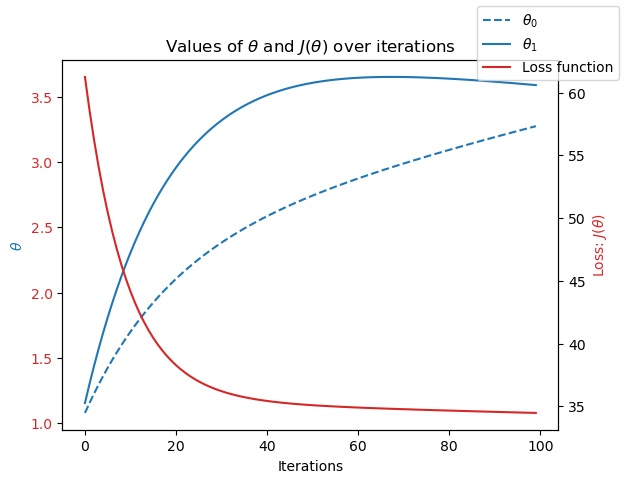

In [56]:
#This will plot your loss, theta0, and theta1.If the result looks like a straight line, it's not converging on an answer!
#Your loss (red) should be trending toward 0.

fig, ax1 = plt.subplots()

# plot thetas over time
color='tab:blue'
ax1.plot(theta0_history, label='$\\theta_{0}$', linestyle='--', color=color)
ax1.plot(theta1_history, label='$\\theta_{1}$', linestyle='-', color=color)
# ax1.legend()
ax1.set_xlabel('Iterations'); ax1.set_ylabel('$\\theta$', color=color);
ax1.tick_params(axis='y', labelcolor=color)

# plot loss function over time
color='tab:red'
ax2 = ax1.twinx()
ax2.plot(J_history, label='Loss function', color=color)
ax2.set_title('Values of $\\theta$ and $J(\\theta)$ over iterations')
ax2.set_ylabel('Loss: $J(\\theta)$', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# ax2.legend();
fig.legend();
plt.show()

In [57]:
%%time
# theta range
theta0_vals = np.linspace(-9,14,100) #Look in the chart above for the limits of where theta0 and theta1 appear.
theta1_vals = np.linspace(-9,13,100) #Put those values as the first two "linspace" numbers in these lines
                                      #Select with large margins, maybe +/- 10
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

# compute cost for each combination of theta
c1=0; c2=0
for i in theta0_vals:
    for j in theta1_vals:
        t = np.array([i, j])
        J_vals[c1][c2] = compute_cost(X, y, t.transpose()).tolist()[0]
        c2=c2+1
    c1=c1+1
    c2=0 # reinitialize to 0

CPU times: user 1.32 s, sys: 29.2 ms, total: 1.35 s
Wall time: 1.32 s


In [58]:
#This figure shows the loss function.

#X = Theta0
#Y - Theta1
#Z = Loss
#Find where it is closest to 0 in X and Y!

#you can click/hold in the graph below to rotate!

fig = go.Figure(data=[go.Surface(x=theta1_vals, y=theta0_vals, z=J_vals)])
fig.update_layout(title='Loss function for different thetas', autosize=True,
                  width=600, height=600, xaxis_title='theta0', 
                 yaxis_title='theta1')
fig.show()

In [59]:
#Here is the same figure as above, with the line the loss function takes toward the minimum.

#X = Theta0
#Y - Theta1
#Z = Loss
#black line = path of loss function over the iterations.
#Find where it is closest to 0 in X and Y!

#you can click/hold in the graph below to rotate!

line_marker = dict(color='#101010', width=2)
fig = go.Figure()
fig.add_surface(x=theta1_vals, y=theta0_vals, z=J_vals)
fig.add_scatter3d(x=theta1_history, y=theta0_history, z=J_history, line=line_marker, name='')
#The below line adds a graph of just the loss over iterations in a 2D plane
plt.plot(theta0_history, theta1_history, 'r+');
fig.update_layout(title='Loss function for different thetas', autosize=True,
                  width=600, height=600, xaxis_title='theta0', 
                 yaxis_title='theta1')
fig.show()

In [60]:
#Rerun the optimization above, but this time start closer to the objective!
#Find where the black line ends near the lowest X/Y/Z coordinate and make that your guess below.

num_iterations=100 #<---start with the same iterations as above
theta_init=np.array([[0],[0]]) #<---make a guess as to a more accurate [x],[y] coordinates near the minimum in the graph above.
alpha= 0.01 #<---start with the same step size as above
theta1, J_history1, theta0_history1, theta1_history1 = gradient_descent(X,y, theta_init,
                                                                   alpha, num_iterations)

In [61]:
#Let's look at the new loss path on the function. It should start much closer to the goal

line_marker = dict(color='#101010', width=2)
fig = go.Figure()
fig.add_surface(x=theta1_vals, y=theta0_vals, z=J_vals)
fig.add_scatter3d(x=theta1_history1, y=theta0_history1, z=J_history1, line=line_marker, name='')
#The below line adds a graph of just the loss over iterations in a 2D plane
plt.plot(theta0_history1, theta1_history1, 'r+');
fig.update_layout(title='Loss function for different thetas', autosize=True,
                  width=600, height=600, xaxis_title='theta0', 
                 yaxis_title='theta1')
fig.show()

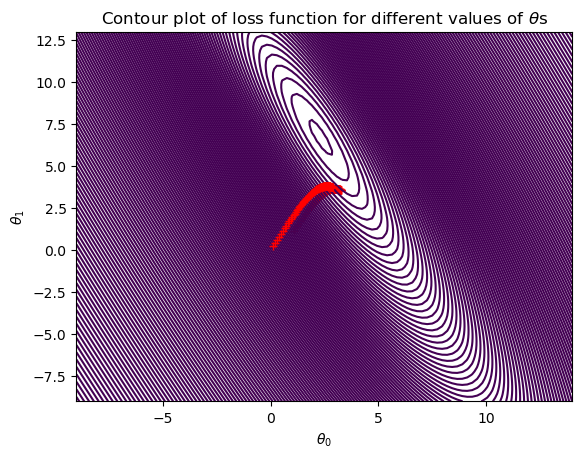

In [62]:
#This plot shows the convergence similar to above, but only in the X/Y plane (there's no height)

plt.contour(theta0_vals, theta1_vals, J_vals, levels = np.logspace(0,10,1000))
plt.xlabel('$\\theta_{0}$'); plt.ylabel("$\\theta_{1}$")
plt.title("Contour plot of loss function for different values of $\\theta$s");
plt.plot(theta0_history1, theta1_history1, 'r+');
plt.show()